In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

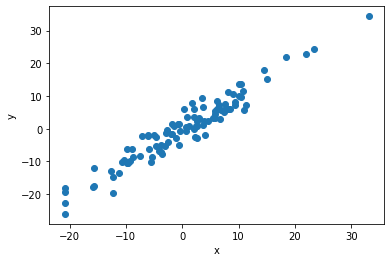

In [2]:
# Creando dataset de ejemplo
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100,1)
plt.plot(X, y, 'o');
plt.ylabel("y");
plt.xlabel("x");

In [3]:
class linear_Regression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [4]:
torch.manual_seed(1)
model = linear_Regression(1,1)

In [5]:
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [6]:
[w, b] = model.parameters()
def get_params():
    return w[0][0].item(), b[0].item()

In [7]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

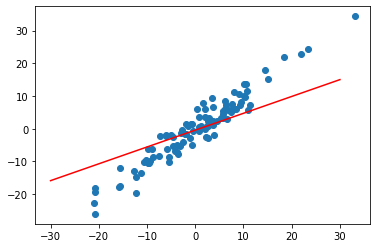

In [8]:
plot_fit("Initial Model")

In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [10]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print('epoch: ', i, "loss: ", loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss:  31.335412979125977
epoch:  1 loss:  23.4608154296875
epoch:  2 loss:  18.218006134033203
epoch:  3 loss:  14.727383613586426
epoch:  4 loss:  12.403324127197266
epoch:  5 loss:  10.855929374694824
epoch:  6 loss:  9.825623512268066
epoch:  7 loss:  9.139581680297852
epoch:  8 loss:  8.682743072509766
epoch:  9 loss:  8.378503799438477
epoch:  10 loss:  8.175860404968262
epoch:  11 loss:  8.040857315063477
epoch:  12 loss:  7.950890064239502
epoch:  13 loss:  7.890903949737549
epoch:  14 loss:  7.8508806228637695
epoch:  15 loss:  7.824148654937744
epoch:  16 loss:  7.806264877319336
epoch:  17 loss:  7.794272422790527
epoch:  18 loss:  7.7862043380737305
epoch:  19 loss:  7.780746936798096
epoch:  20 loss:  7.777029991149902
epoch:  21 loss:  7.774470806121826
epoch:  22 loss:  7.772683620452881
epoch:  23 loss:  7.7714104652404785
epoch:  24 loss:  7.770479679107666
epoch:  25 loss:  7.769777297973633
epoch:  26 loss:  7.769228458404541
epoch:  27 loss:  7.76877975463

Text(0.5, 0, 'epoch')

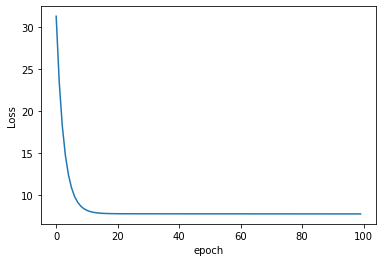

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

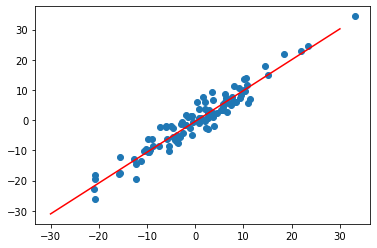

In [12]:
plot_fit("Trained Model")